# Homework 2

### Libraries 

In [1]:
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import steam_analysis as steam

### Load dataset

In [3]:
#Dataset filenames
dataset_main = 'dataset/steam_reviews.csv'
dataset_bonus1 = 'dataset/steam_reviews_bonus_1.csv'
dataset_bonus2 = 'dataset/steam_reviews_bonus_2.csv'

In [5]:
#Load main dataset
df = pd.read_csv(dataset_main)

In [5]:
#Load bonus dataset
df = pd.concat(pd.read_csv(dataset_bonus1))
df = pd.concat(pd.read_csv(dataset_bonus1))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

### DEBUG

In [5]:
#Skip the two above cells and run this one instead if you have problems loading the whole dataset
for chunk in pd.read_csv(dataset_main, chunksize=1000000):
    df = chunk
    break

# [RQ1] Exploratory Data Analysis (EDA)

### Tabular analysis

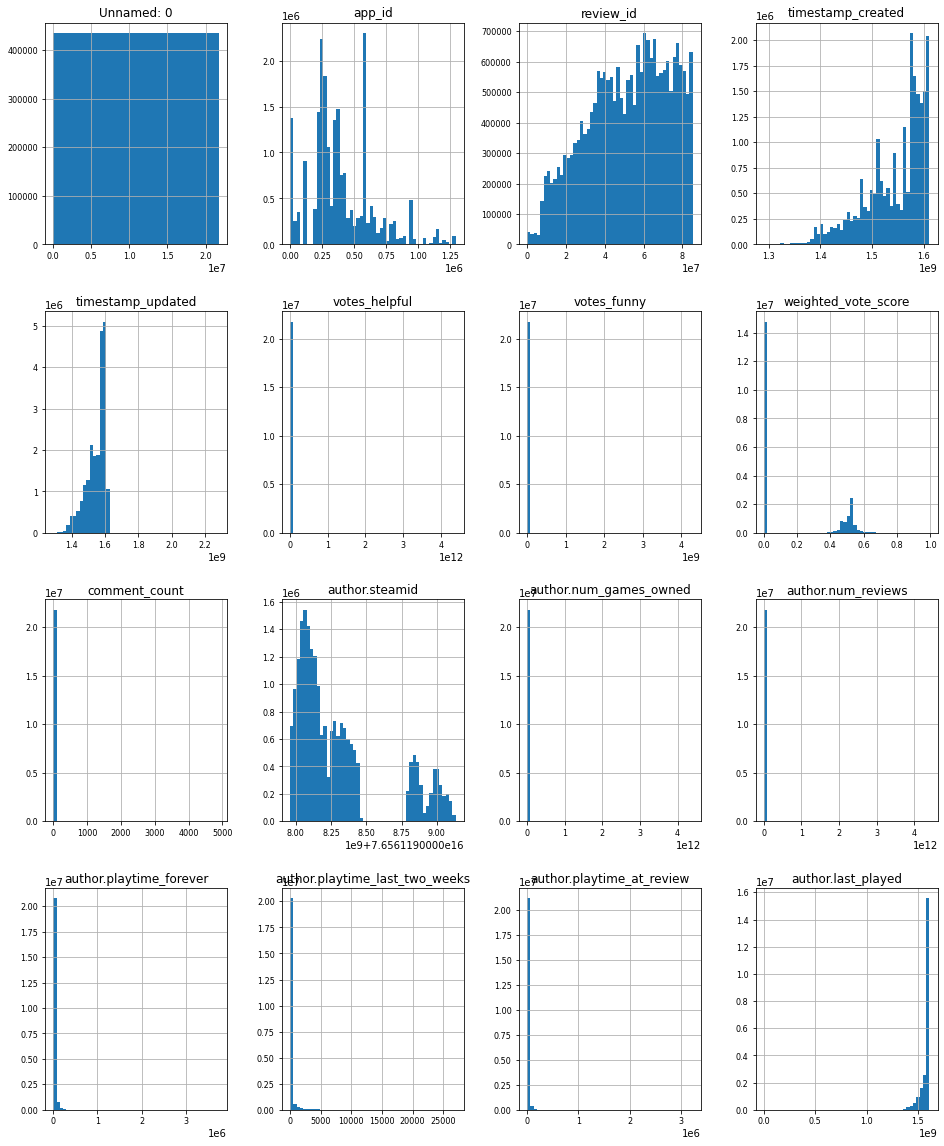

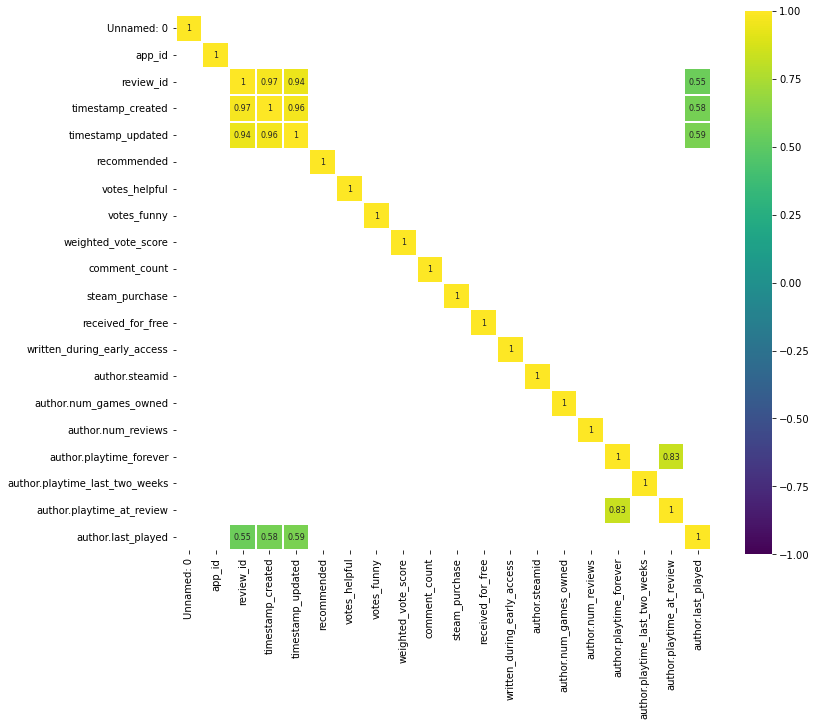

In [6]:
steam.dataset_analysis_table(df)

In [7]:
steam.describe_dataset(df)

         Unnamed: 0        app_id     review_id  timestamp_created  \
count  2.174737e+07  2.174737e+07  2.174737e+07       2.174737e+07   
mean   1.087369e+07  3.928181e+05  5.187500e+07       1.544432e+09   
std    6.277927e+06  2.480977e+05  2.084267e+07       5.812194e+07   
min    0.000000e+00  7.000000e+01  4.300000e+01       1.290198e+09   
25%    5.436844e+06  2.427600e+05  3.639355e+07       1.510223e+09   
50%    1.087369e+07  3.595500e+05  5.384058e+07       1.562446e+09   
75%    1.631053e+07  5.780800e+05  6.928793e+07       1.589696e+09   
max    2.174738e+07  1.291340e+06  8.521867e+07       1.611426e+09   

       timestamp_updated  votes_helpful   votes_funny  weighted_vote_score  \
count       2.174737e+07   2.174737e+07  2.174737e+07         2.174737e+07   
mean        1.547556e+09   4.044689e+05  1.267917e+05         1.654424e-01   
std         5.689899e+07   1.333741e+09  2.333553e+07         2.434006e-01   
min         1.290198e+09   0.000000e+00  0.000000e+00    

# [RQ2]

### Plot the number of reviews for each application in descending order.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homeb

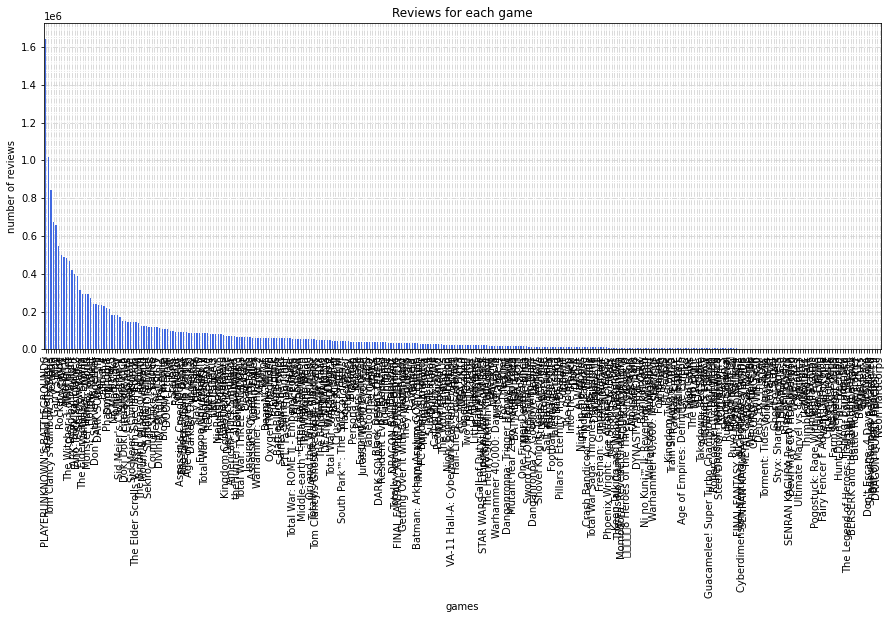

In [8]:
steam.plot_reviews_chart(df)

### What applications have the best Weighted Vote Score?

In [9]:
steam.best_weighted_vote_score(df)

app_name
Hunt Down The Freeman    0.502150
Urban Empire             0.438623
METAL GEAR SURVIVE       0.421632
Identity                 0.415384
Umbrella Corps           0.414678
Name: weighted_vote_score, dtype: float64


### Which applications have the most and the least recommendations?

In [10]:
steam.recommendations_summary(df)

Most recommended games: 
app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Name: recommended, dtype: int64 


Least recommended games: 
app_name
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  89
Name: recommended, dtype: int64


### How many of these applications were purchased, and how many were given for free?

                       received_for_free  steam_purchase
app_name                                                
20XX                                  51            3204
A Hat in Time                        820           27262
A Short Hike                          99            4566
A Way Out                            296            7416
ARK: Survival Evolved              12046          316015 



Games received for free: 688061/21747371


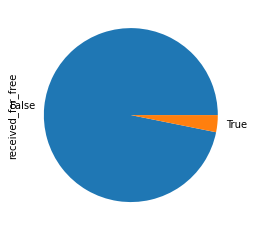

Games purchased: 16842432/21747371


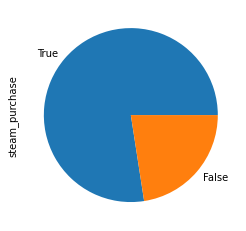

In [11]:
steam.plot_free_or_purchased(df)

# [RQ3]

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [12]:
steam.most_common_review_time(df, 5)

14:50
15:5
14:37
15:7
15:4


### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

  time interval (start, end)  total reviews
0       (06:00:00, 10:59:59)        3925459
1       (11:00:00, 13:59:59)        2971997
2       (14:00:00, 16:59:59)        3377469
3       (17:00:00, 19:59:59)        3257494
4       (20:00:00, 23:59:59)        3617426
5       (00:00:00, 02:59:59)        2351647
6       (03:00:00, 05:59:59)        2245879


<Figure size 432x288 with 0 Axes>

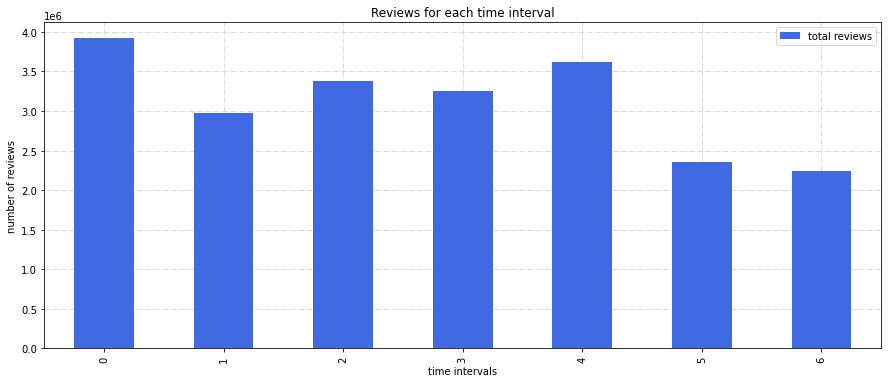

In [13]:
time_intervals = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

steam.reviews_between_time_intervals(df, time_intervals)
